# Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Loading the dataset for test

In [2]:
df = pd.read_excel('dataset.xlsx', engine='openpyxl')

In [3]:
df.head()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EcYear                    46189 non-null  object        
 1   EcNumber                  38978 non-null  object        
 2   CallTime                  40233 non-null  datetime64[ns]
 3   EmergencyArea             46188 non-null  object        
 4   TotalPatientsInEmergency  46189 non-null  object        
 5   Gender                    46188 non-null  object        
 6   Age                       46188 non-null  float64       
 7   HospitalName              24239 non-null  object        
 8   Reason                    46188 non-null  object        
 9   responsetime              46184 non-null  float64       
 10  EducationTitle            46188 non-null  object        
 11  InjuryType                46187 non-null  object        
 12  Cause             

In [5]:
df.describe()

,CallTime,Age,responsetime,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
count,40233,46188.000000,46184.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000
mean,2021-11-23 18:43:21.099967744,32.447129,6.256106,0.008725,0.967242,0.009202,0.234049,0.001970,0.087297,0.009830,0.002208,0.044948,0.117392,0.009656
min,1900-01-02 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-01-03 12:01:47,21.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021-12-01 09:01:00,29.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-11-03 20:15:00,42.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023-07-31 17:11:00,118.000000,101.000000,2.000000,10.000000,2.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,4.000000,2.000000
std,NaN,15.176229,4.901342,0.093467,0.578776,0.100349,0.448054,0.044344,0.289319,0.098657,0.046942,0.220947,0.334686,0.098893


# Dropping the null rows

In [6]:
df.dropna(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18578 entries, 0 to 46185
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EcYear                    18578 non-null  object        
 1   EcNumber                  18578 non-null  object        
 2   CallTime                  18578 non-null  datetime64[ns]
 3   EmergencyArea             18578 non-null  object        
 4   TotalPatientsInEmergency  18578 non-null  object        
 5   Gender                    18578 non-null  object        
 6   Age                       18578 non-null  float64       
 7   HospitalName              18578 non-null  object        
 8   Reason                    18578 non-null  object        
 9   responsetime              18578 non-null  float64       
 10  EducationTitle            18578 non-null  object        
 11  InjuryType                18578 non-null  object        
 12  Cause                  

# Handling mixed datatypes

In [8]:
# Converting the TotalPatientsInEmergency column to numeric
columns = ['EcYear','EcNumber','TotalPatientsInEmergency']
for column in columns:
    df[column] = df[column].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18578 entries, 0 to 46185
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EcYear                    18578 non-null  int64         
 1   EcNumber                  18578 non-null  int64         
 2   CallTime                  18578 non-null  datetime64[ns]
 3   EmergencyArea             18578 non-null  object        
 4   TotalPatientsInEmergency  18578 non-null  int64         
 5   Gender                    18578 non-null  object        
 6   Age                       18578 non-null  float64       
 7   HospitalName              18578 non-null  object        
 8   Reason                    18578 non-null  object        
 9   responsetime              18578 non-null  float64       
 10  EducationTitle            18578 non-null  object        
 11  InjuryType                18578 non-null  object        
 12  Cause                  

# Encoding

In [9]:
label_encoder = LabelEncoder()

# LabelEncodding for PatientStatus
status_mapping = {
    'Alive & stable': 0,
    'Alive & unstable': 1,  
    'Dead': 2  
}

# Applying the mapping to the 'PatientStatus' column
df['PatientStatusEncoded'] = df['PatientStatus'].map(status_mapping)

# Applying label for other columns
df['GenderEncoded'] = label_encoder.fit_transform(df['Gender'])
df['EducationTitleEncoded'] = label_encoder.fit_transform(df['EducationTitle'])

In [10]:
# Target-encodding
def target_encoding(column, target):
    return df.groupby(column)[target].transform('mean')
df['InjuryTypeEncoded'] = target_encoding('InjuryType', 'PatientStatusEncoded')
df['CauseEncoded'] = target_encoding('Cause', 'PatientStatusEncoded')
df['ReasonEncoded'] = target_encoding('Reason', 'PatientStatusEncoded')
df['EmergencyAreaEncoded'] = target_encoding('EmergencyArea', 'PatientStatusEncoded')
df['HospitalNameEncoded'] = target_encoding('HospitalName', 'PatientStatusEncoded')



In [11]:
# dropping the original columns
df.drop(['PatientStatus','InjuryType','Cause','EducationTitle','Gender','Reason','EmergencyArea','HospitalName'], axis=1, inplace=True)

# Handling outliers

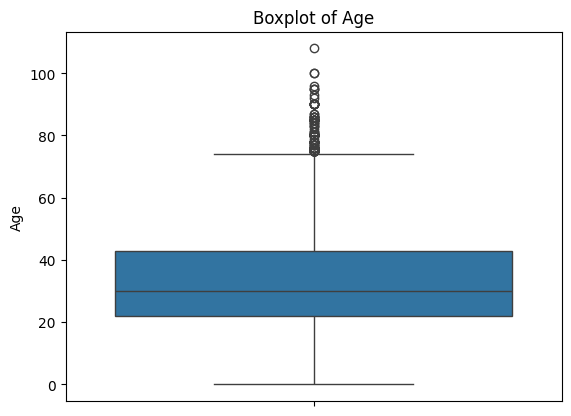

In [12]:
sns.boxplot(data=df['Age'])
plt.title("Boxplot of Age")
plt.show()

In [13]:
# Calculate the IQR for the 'Age' column
Q1_age = np.quantile(df['Age'], 0.25)
Q3_age = np.quantile(df['Age'], 0.75)
IQR_age = Q3_age - Q1_age

# Define the lower and upper fences for 'Age'
lower_fence_age = Q1_age - 1.5 * IQR_age
upper_fence_age = Q3_age + 1.5 * IQR_age

# Remove outliers for 'Age'
df = df[(df['Age'] >= lower_fence_age) & (df['Age'] <= upper_fence_age)]

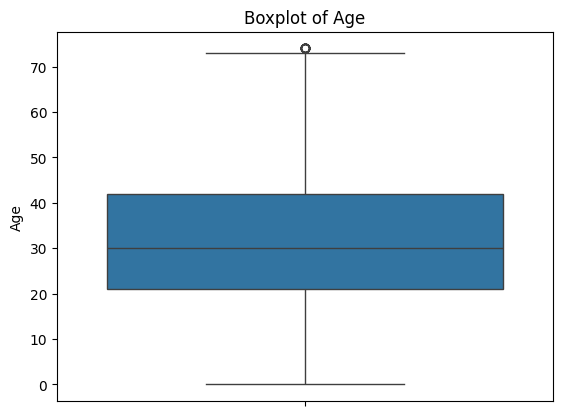

In [14]:
sns.boxplot(data=df['Age'])
plt.title("Boxplot of Age")
plt.show()

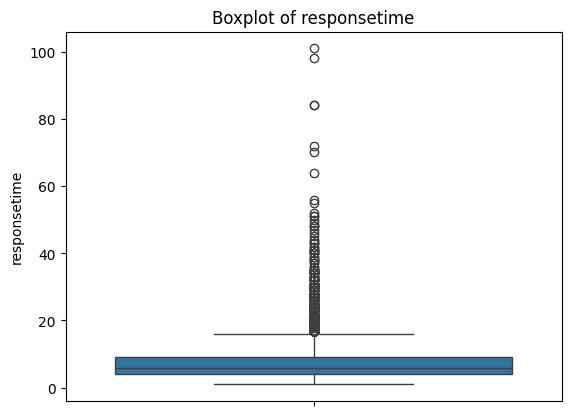

In [15]:
sns.boxplot(data=df['responsetime'])
plt.title("Boxplot of responsetime")
plt.show()

In [16]:
# Calculate the IQR for the 'responsetime' column
Q1_responsetime = np.quantile(df['responsetime'], 0.25)
Q3_responsetime = np.quantile(df['responsetime'], 0.75)
IQR_responsetime = Q3_responsetime - Q1_responsetime

# Define the lower and upper fences for 'responsetime'
lower_fence_responsetime = Q1_responsetime - 1.5 * IQR_responsetime
upper_fence_responsetime = Q3_responsetime + 1.5 * IQR_responsetime

# Remove outliers for 'responsetime'
df = df[(df['responsetime'] >= lower_fence_responsetime) & (df['responsetime'] <= upper_fence_responsetime)]

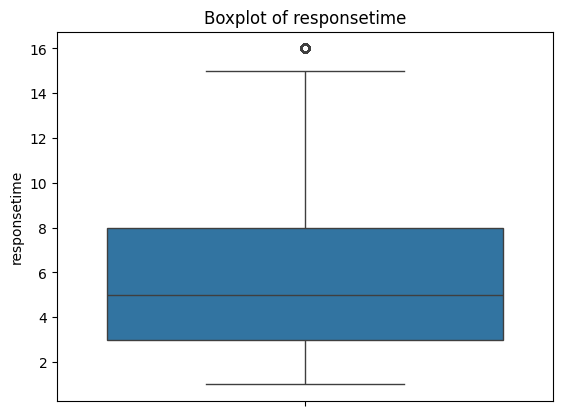

In [17]:
sns.boxplot(data=df['responsetime'])
plt.title("Boxplot of responsetime")
plt.show()

# Heatmap

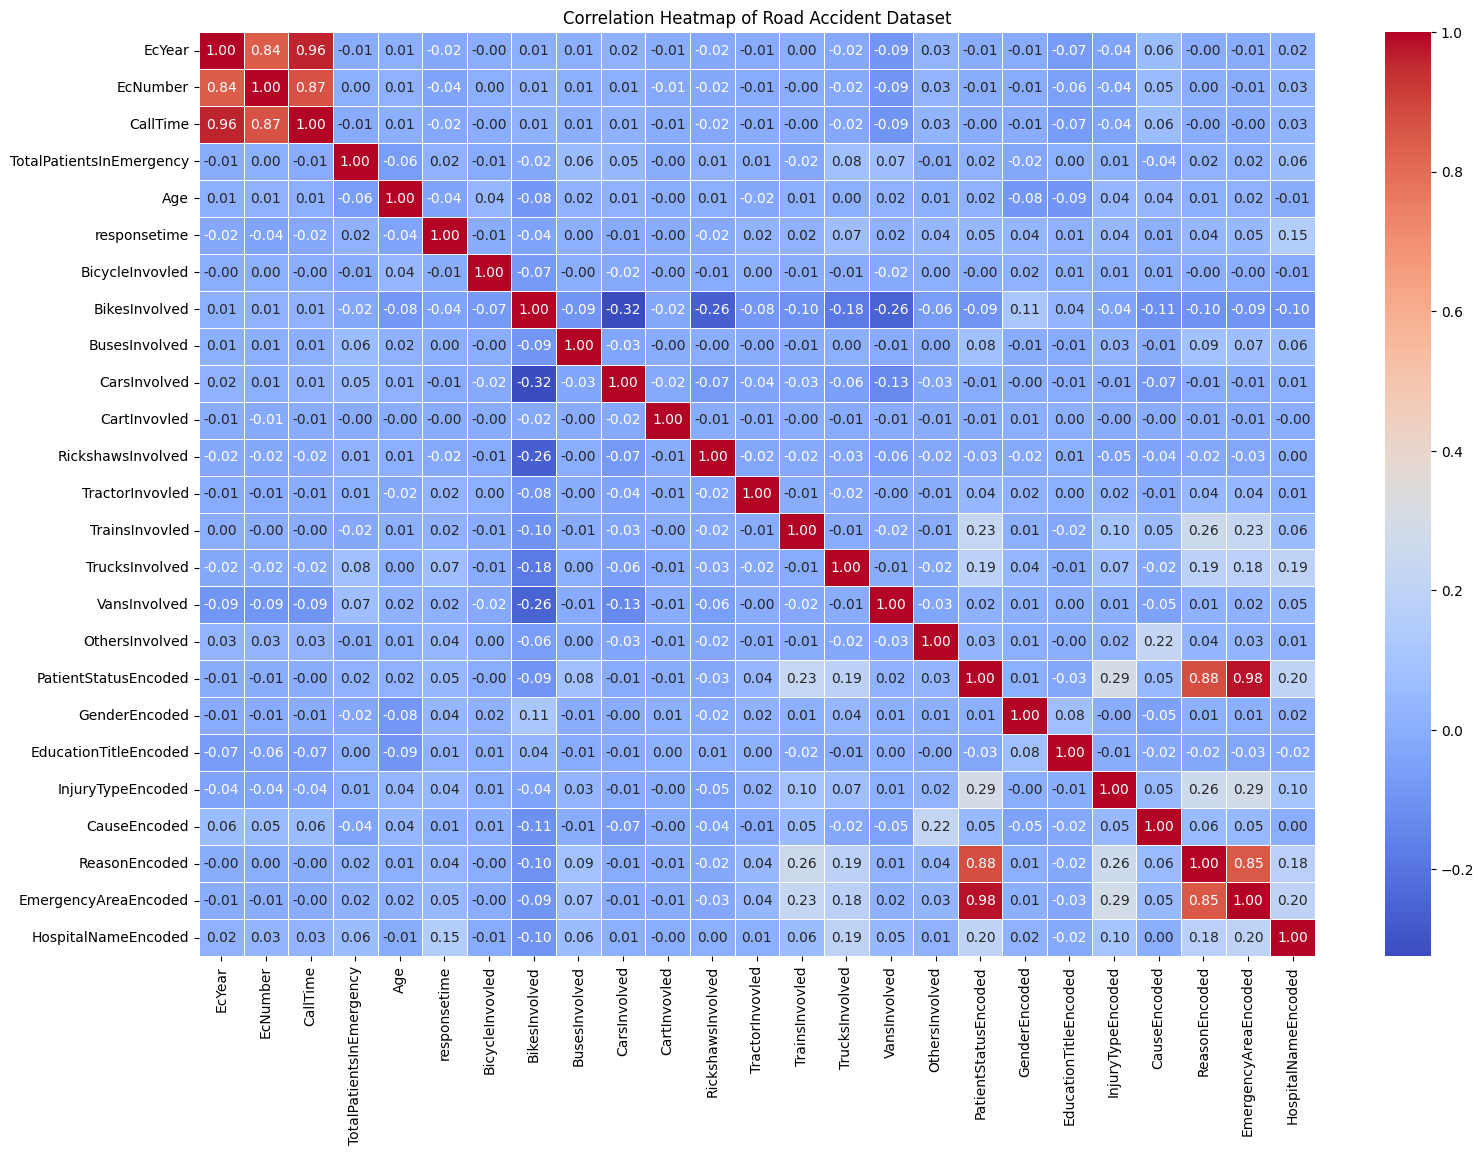

In [18]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Road Accident Dataset')
plt.show()

# Loading the dataset

In [19]:
dataset = pd.read_excel('dataset.xlsx', engine='openpyxl')

# Dropping the irrelevant columns from the main dataset

In [20]:
# Dropping features based on the previous heatmap
dataset.drop(['EcYear','EcNumber','Gender','CallTime','EducationTitle','TotalPatientsInEmergency','Age','responsetime'],axis=1,inplace=True)

In [21]:
dataset.head(5)

,EmergencyArea,HospitalName,Reason,InjuryType,Cause,PatientStatus,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,NEAR APS SCHOOL FORT ROAD RWP,BBH,Bike Slip,Minor,Over Speed,Alive & unstable,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Infront of Daig.com, Near Dha gate 2, gt road...",NaN,Car hit Footpath,Minor,Over Speed,Alive & stable,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Muhammadi chowk arshad bakery khyaban e sirsye...,BBH,Rickshaw hit with Car,Single Fracture,Over Speed,Alive & unstable,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",NaN,Car hit Car and runaway,Minor,Over Speed,Alive & stable,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,NaN,Unknown Bike hit Bike and runaway,Single Fracture,Over Speed,Alive & stable,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Grouping the vehicle columns

In [22]:
# Creating grouped vehicle columns
dataset['TwoWheelerInvolved'] = dataset['BicycleInvovled'] + dataset['BikesInvolved']
dataset['HeavyVehiclesInvolved'] = dataset['BusesInvolved'] + dataset['TrucksInvolved'] + dataset['TractorInvovled']+ dataset['TrainsInvovled']
dataset['LightVehiclesInvolved'] = dataset['CarsInvolved'] + dataset['VansInvolved']
dataset['OtherVehiclesInvolved'] = dataset['RickshawsInvolved'] + dataset['OthersInvolved']+ dataset['CartInvovled']

# Dropping original vehicle columns after grouping
dataset.drop([
    'BicycleInvovled', 
    'BikesInvolved', 
    'BusesInvolved', 
    'CarsInvolved', 
    'CartInvovled', 
    'RickshawsInvolved', 
    'TractorInvovled', 
    'TrainsInvovled', 
    'TrucksInvolved', 
    'VansInvolved', 
    'OthersInvolved'
],axis=1,inplace=True)

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmergencyArea          46188 non-null  object 
 1   HospitalName           24239 non-null  object 
 2   Reason                 46188 non-null  object 
 3   InjuryType             46187 non-null  object 
 4   Cause                  46187 non-null  object 
 5   PatientStatus          46187 non-null  object 
 6   TwoWheelerInvolved     46187 non-null  float64
 7   HeavyVehiclesInvolved  46187 non-null  float64
 8   LightVehiclesInvolved  46187 non-null  float64
 9   OtherVehiclesInvolved  46187 non-null  float64
dtypes: float64(4), object(6)
memory usage: 3.5+ MB


# Encoding

In [24]:
# LabelEncodding for PatientStatus
status_mapping = {
    'Alive & stable': 0,
    'Alive & unstable': 1,  
    'Dead': 2  
}
# Applying the mapping to the 'PatientStatus' column
dataset['PatientStatusEncoded'] = dataset['PatientStatus'].map(status_mapping)


In [25]:
# Target-encodding
def target_encoding(column, target):
    return dataset.groupby(column)[target].transform('mean')
dataset['InjuryTypeEncoded'] = target_encoding('InjuryType', 'PatientStatusEncoded')
dataset['CauseEncoded'] = target_encoding('Cause', 'PatientStatusEncoded')
dataset['ReasonEncoded'] = target_encoding('Reason', 'PatientStatusEncoded')
dataset['EmergencyAreaEncoded'] = target_encoding('EmergencyArea', 'PatientStatusEncoded')


In [26]:
# dropping the original columns
dataset.drop(['InjuryType','Cause','Reason','EmergencyArea','PatientStatus'], axis=1, inplace=True)

# Imputing values for HospitalName

In [27]:
imputer = SimpleImputer(strategy='most_frequent')
# Impute missing values in the 'HospitalName' column
imputed_hospital_names = imputer.fit_transform(dataset[['HospitalName']])

# Select the first column (assuming it contains the imputed values)
dataset['HospitalName'] = imputed_hospital_names[:, 0]

In [28]:
#Checking the null values
dataset.isnull().sum()

HospitalName             0
TwoWheelerInvolved       2
HeavyVehiclesInvolved    2
LightVehiclesInvolved    2
OtherVehiclesInvolved    2
PatientStatusEncoded     2
InjuryTypeEncoded        2
CauseEncoded             2
ReasonEncoded            2
EmergencyAreaEncoded     3
dtype: int64

In [29]:
# Dropping all the null values
dataset.dropna(inplace = True)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46186 entries, 0 to 46188
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HospitalName           46186 non-null  object 
 1   TwoWheelerInvolved     46186 non-null  float64
 2   HeavyVehiclesInvolved  46186 non-null  float64
 3   LightVehiclesInvolved  46186 non-null  float64
 4   OtherVehiclesInvolved  46186 non-null  float64
 5   PatientStatusEncoded   46186 non-null  float64
 6   InjuryTypeEncoded      46186 non-null  float64
 7   CauseEncoded           46186 non-null  float64
 8   ReasonEncoded          46186 non-null  float64
 9   EmergencyAreaEncoded   46186 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.9+ MB


# Encoding for HospitalName

In [31]:
dataset['HospitalNameEncoded'] = target_encoding('HospitalName', 'PatientStatusEncoded')

In [32]:
# dropping the original columns
dataset.drop(['HospitalName'], axis=1, inplace=True)

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46186 entries, 0 to 46188
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TwoWheelerInvolved     46186 non-null  float64
 1   HeavyVehiclesInvolved  46186 non-null  float64
 2   LightVehiclesInvolved  46186 non-null  float64
 3   OtherVehiclesInvolved  46186 non-null  float64
 4   PatientStatusEncoded   46186 non-null  float64
 5   InjuryTypeEncoded      46186 non-null  float64
 6   CauseEncoded           46186 non-null  float64
 7   ReasonEncoded          46186 non-null  float64
 8   EmergencyAreaEncoded   46186 non-null  float64
 9   HospitalNameEncoded    46186 non-null  float64
dtypes: float64(10)
memory usage: 3.9 MB


# Generating Heatmap

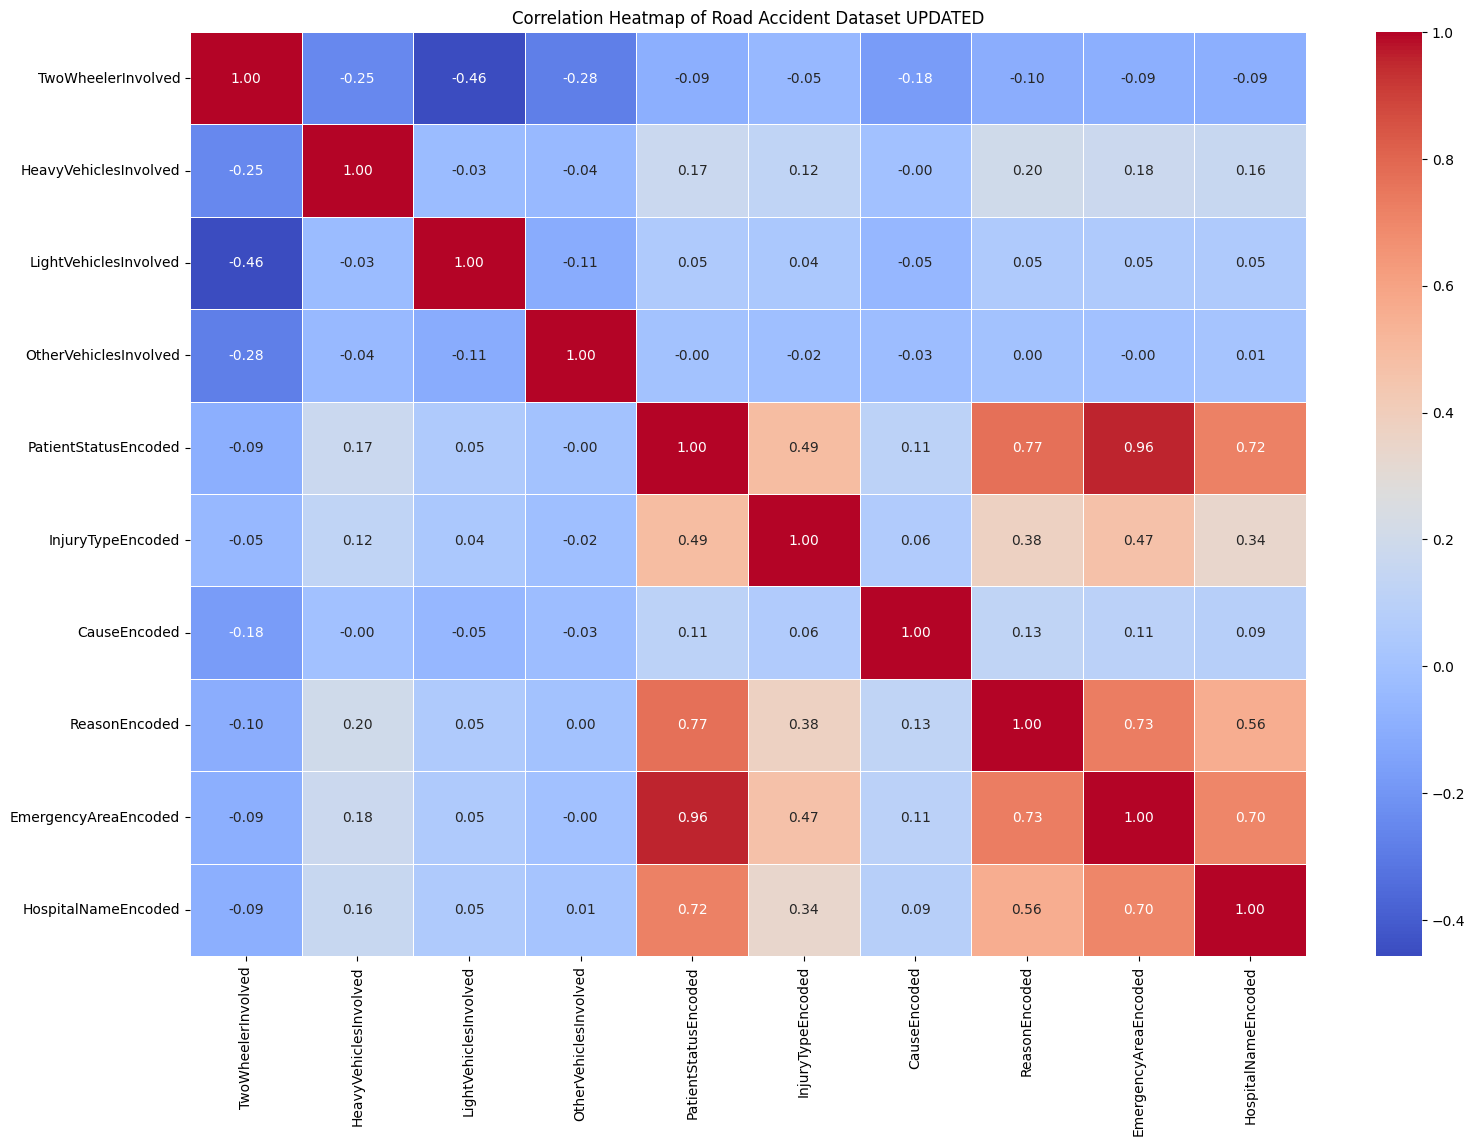

In [34]:
# Compute the correlation matrix
corr_matrix = dataset.corr()

# Plot the correlation heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Road Accident Dataset UPDATED')
plt.show()

# Splitting the dataset


In [35]:
X = dataset.drop("PatientStatusEncoded", axis=1) # Features
y = dataset["PatientStatusEncoded"] # Target variable
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42)
# Display the size of the training and testing sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 36948 samples
Test set size: 9238 samples
